In [18]:
import MCMC as MCSZ
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import Mather_photonNEP12a as NEP

In [19]:
#Constants
c = 299792458.0                                         # Speed of light - [c] = m/s
h_p = 6.626068e-34                                      # Planck's constant in SI units
k_b = 1.38065e-23                                       # Boltzmann constant in SI units
MJyperSrtoSI = 1E-20
GHztoHz = 1E9
h = 4.135*10**(-15) #in eV s
k = 8.617*10**(-5) # eV/K
m = 9.109*10**(-31) # kg
TCMB = 2.725 # K
# canonical CMB


#Specify parameter values

#Galaxy cluster parameters
y = 5.4e-5
electron_temperature = 5.0 #KeV
tau = MCSZ.y_to_tau(y,electron_temperature)
peculiar_vel = 0.000001 #km/s
betac = peculiar_vel/(3e5)

#SIDES model values
amp_sides = 1
b_sides = 1

#Specify which SIDES pixel to look at 
SIDES_longitude = 120
SIDES_latitude = 120

#CMB anisotropies values
amp_ksz = 0#6e-7
amp_tsz = 0#6e-7
amp_cmb = 0#1e-6

#Integration time

labels = ('tau','temperature','betac','amp_sides','b_sides')
theta = (y, electron_temperature, betac, amp_sides, b_sides)
anisotropies = (amp_ksz, amp_tsz, amp_cmb)

In [20]:
freq = np.linspace(80e9,720e9,1000)
templates_emission_lines = MCSZ.data_indv(theta, anisotropies, freq, SIDES_longitude, SIDES_latitude)

/home/bolocam/erapaport/OLIMPO-forecasting/MCMC.py:64: RuntimeWarning: divide by zero encountered in log
  f = interp1d(np.log(datax),np.log(datay),kind='slinear',bounds_error=False,fill_value=0)


In [21]:
templates_continuum = MCSZ.model_indv(theta,anisotropies,freq)

In [22]:
rms_values = [0.36, 0.27, 0.70, 1.76] #uK^2 for 80 hour integration
#rms_values = [0.72, 0.54, 1.40, 3.52] #uK^2 for 20 hour integration

frequencies = [145,250,365,460]

In [23]:
x = h_p*np.array(frequencies)*1e9/(k_b*TCMB)
print(x)

[2.55372299 4.40297068 6.42833719 8.10146605]


In [24]:
nu_total_array = np.array(frequencies)
sigma_b_array = 2*k_b*((np.array(frequencies)*1e9/c)**2)*(x/(np.exp(x)-1))*(x * np.exp(x))/(np.exp(x)-1)*np.array(rms_values)*1e-6

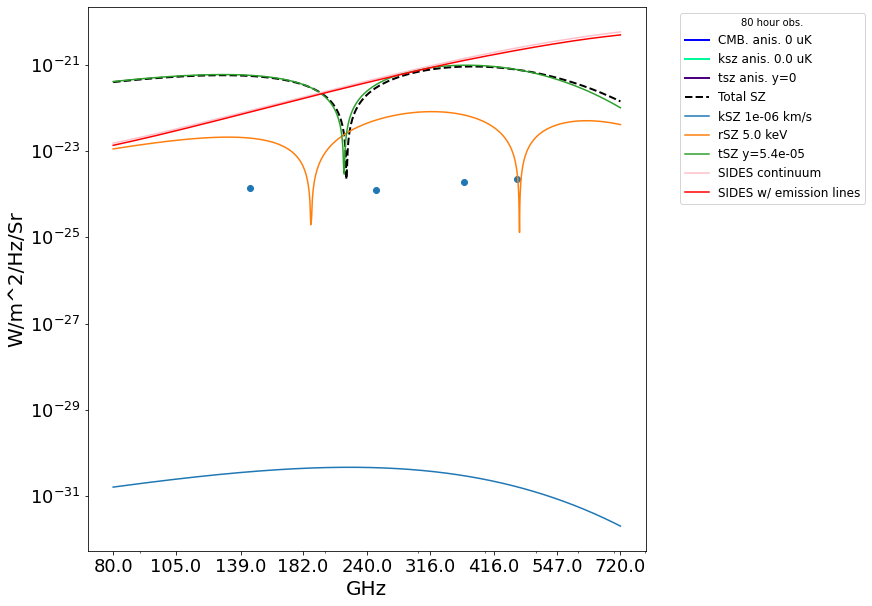

In [25]:
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
labs = ['SZ','CIB','CMB. anis. ' + str(round(amp_cmb*1e6)) + ' uK','ksz anis. ' + str(amp_ksz*1e6) + ' uK','tsz anis. y=' + str(amp_tsz)]
tempcolors = ['blue','mediumspringgreen','indigo','red','green','purple','magenta','black','violet','gray']
plt.figure(figsize=(10,10))

#Plot CMB, ksz, tsz, anisotropies
for i in range(len(templates_emission_lines)-2):
    plt.plot(freq*1e-9,abs(templates_emission_lines[i+2]),color=tempcolors[i],label=labs[i+2],linewidth=2)
    
#Plot SZ components
plt.plot(freq*1e-9,abs(templates_emission_lines[0]),'--k',label='Total SZ',linewidth=2)
plt.plot(freq*1e-9,abs(templates_emission_lines[0] - MCSZ.szpack_signal(freq,MCSZ.y_to_tau(y,electron_temperature),electron_temperature,1e-11)),\
         label='kSZ ' + str(betac*3e5) + ' km/s')
plt.plot(freq*1e-9,abs(MCSZ.szpack_signal(freq,MCSZ.y_to_tau(y,electron_temperature),electron_temperature,1e-11) - \
                  MCSZ.classical_tsz(y,freq)),label='rSZ ' + str(electron_temperature) + ' keV')
plt.plot(freq*1e-9,abs(MCSZ.classical_tsz(y,freq)),label='tSZ y=' + str(y))

#SIDES continuum model and emission line data
plt.plot(freq*1e-9,abs(templates_continuum[1]),color='pink',label='SIDES continuum')
plt.plot(freq*1e-9,abs(templates_emission_lines[1]),color='red',label='SIDES w/ emission lines')

#Plot frequency channel NESB
plt.scatter(nu_total_array,sigma_b_array)

plt.xscale('log')
plt.yscale('log')
#plt.xlim([80, 720])
#plt.ylim(1E-27, 2E-20)
plt.xlabel('GHz',fontsize=20)
plt.ylabel('W/m^2/Hz/Sr',fontsize=20)

#Make xticks match as best as possible
plt.xticks(np.rint(np.logspace(np.log10(80), np.log10(7.2e2),num=9)),np.rint(np.logspace(np.log10(80), np.log10(7.2e2),num=9)))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',\
           frameon=True, prop={'size':12}, ncol=1, title= '80 hour obs.')
plt.show()

In [26]:
print(sigma_b_array)

[1.38717811e-24 1.26101318e-24 1.91851812e-24 2.27755595e-24]


In [13]:
np.shape(np.sum(templates_continuum,axis=0))

(1000,)

In [14]:
freq[102]*1e-9,freq[265]*1e-9,freq[445]*1e-9,freq[593]*1e-9

(145.34534534534535, 249.7697697697698, 365.0850850850851, 459.89989989989994)

In [15]:
sum_total = np.sum(templates_emission_lines,axis=0)

In [16]:
values = [abs(0.005*sum_total[102]),abs(0.01*sum_total[265]),abs(0.015*sum_total[445]),abs(0.03*sum_total[593])]

In [17]:
values

[2.3632021446498476e-24,
 7.363063691902759e-24,
 3.2827716704608904e-23,
 8.927510963051855e-23]

In [24]:
values = [abs(0.01*sum_total[103]),abs(0.01*sum_total[262]),abs(0.01*sum_total[415]),abs(0.01*sum_total[634])]

In [25]:
values

[3.1273899373604347e-23,
 5.394217720340627e-23,
 1.108232907262466e-22,
 9.68364371776335e-23]

In [26]:
values = [abs(0.005*sum_total[103]),abs(0.005*sum_total[262]),abs(0.005*sum_total[415]),abs(0.005*sum_total[634])]

In [27]:
values

[1.5636949686802174e-23,
 2.6971088601703137e-23,
 5.54116453631233e-23,
 4.841821858881675e-23]

In [13]:
from astropy.io import fits
fname = '/data/bolocam/bolocam/erapaport/continuum.fits'
hdu = fits.open(fname)
image_data = hdu[0].data

In [17]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  169                                                  
NAXIS2  =                  169                                                  
NAXIS3  =                  751                                                  
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =      85.009670090347 / Pixel coordinate of reference point            
CRPIX2  =      85.004179600546 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =   0.0083333333333333 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0083333333333333 / [deg] Coordinate increment at reference point  
CDELT3  =         2000000000